In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import warnings
from collections import namedtuple
import cycler
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")
warnings.filterwarnings("ignore")


In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
mean_1 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['bill_length_mm'].mean()
mean_2 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['bill_depth_mm'].mean()
mean_3 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['flipper_length_mm'].mean()
mean_4 = penguins.loc[(penguins['species'] == 'Adelie')&(penguins['island'] == 'Torgersen')]['body_mass_g'].mean()
mean_5 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['bill_length_mm'].mean()
mean_6 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['bill_depth_mm'].mean()
mean_7 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['flipper_length_mm'].mean()
mean_8 = penguins.loc[(penguins['species'] == 'Gentoo')&(penguins['island'] == 'Biscoe')]['body_mass_g'].mean()

penguins.loc[penguins['species'] == 'Adelie', 'sex'] = penguins.loc[penguins['species'] == 'Adelie', 'sex'].fillna('Male')

penguins.loc[penguins['species'] == 'Gentoo', 'sex'] = penguins.loc[penguins['species'] == 'Gentoo', 'sex'].fillna('Female')

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_length_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_length_mm'].fillna(mean_1)

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_depth_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'bill_depth_mm'].fillna(mean_2)

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'flipper_length_mm'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'flipper_length_mm'].fillna(mean_3)

penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'body_mass_g'] = penguins.loc[(penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen'), 'body_mass_g'].fillna(mean_4)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_length_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_length_mm'].fillna(mean_5)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_depth_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'bill_depth_mm'].fillna(mean_6)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'flipper_length_mm'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'flipper_length_mm'].fillna(mean_7)

penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'body_mass_g'] = penguins.loc[(penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe'), 'body_mass_g'].fillna(mean_8)

In [5]:
df = penguins.copy()

# Probabilidades


In [6]:
#Frequência Absoluta de Espécies, Ilhas e Sexo

species_abs_freq = df.species.value_counts()
island_abs_freq = df.island.value_counts()
sex_abs_freq = df.sex.value_counts()


print((species_abs_freq))
print((island_abs_freq))
print((sex_abs_freq))


print(f'Por exemplo a frequência absoluta de Adelie: {species_abs_freq[0]}  e a frequência absoluta de Biscoe: {island_abs_freq[0]}')


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
Male      174
Female    170
Name: count, dtype: int64
Por exemplo a frequência absoluta de Adelie: 152  e a frequência absoluta de Biscoe: 168


A frequência relativa \( $f_i$ \) para a categoria \( $i$ \) é calculada como:

$$
f_i = \frac{\text{Número de ocorrências da categoria } i}{\text{Número total de observações}}
$$


In [7]:
# Frequências relativas 

species_rel_freq = df.species.value_counts()/len(df)*100
island_rel_freq = df.island.value_counts()/len(df)*100
sex_rel_freq = df.sex.value_counts()/len(df)*100

print((species_rel_freq))
print((island_rel_freq))
print((sex_rel_freq))

species
Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: count, dtype: float64
island
Biscoe       48.837209
Dream        36.046512
Torgersen    15.116279
Name: count, dtype: float64
sex
Male      50.581395
Female    49.418605
Name: count, dtype: float64


# Probabilidades

### Fórmulas de Probabilidade Básicas

1. **Probabilidade de um evento:**
   $$ P(A) $$

2. **Probabilidade condicional:**
   $$ P(A | B) = \frac{P(A \cap B)}{P(B)} $$

3. **Probabilidade da união de dois eventos (Regra da Soma):**
   $$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $$

4. **Probabilidade da interseção de dois eventos (Regra da Multiplicação):**
   $$ P(A \cap B) = P(A | B) \cdot P(B) $$

5. **Probabilidade da Soma de Eventos Mutuamente Exclusivos**

Para eventos mutuamente exclusivos $A$ e $B$, onde $A \cap B = \emptyset$, a probabilidade da união dos eventos é simplesmente a soma das probabilidades individuais:

$$ P(A \cup B) = P(A) + P(B) $$

6. **Probabilidade do Produto de Eventos Independentes**

Para eventos independentes $A$ e $B$, a probabilidade da interseção dos eventos é o produto das probabilidades individuais:

$$ P(A \cap B) = P(A) \cdot P(B) $$

### Regras da Soma e Interseção

- **Regra da Soma:** Para calcular a probabilidade da união de dois eventos $A$ e $B$, devemos somar as probabilidades dos eventos individuais e subtrair a probabilidade da interseção, para evitar a duplicação da probabilidade dessa interseção.

- **Regra da Interseção:** Para calcular a probabilidade da interseção de dois eventos $A$ e $B$, multiplicamos a probabilidade condicional de $A$ dado $B$ pela probabilidade de $B$. Isso ocorre porque a probabilidade de ambos os eventos ocorrerem ao mesmo tempo é equivalente à probabilidade de $A$ ocorrer dado que $B$ já ocorreu, multiplicado pela probabilidade de $B$ ocorrer inicialmente.

Essas fórmulas e regras são fundamentais na teoria da probabilidade e são amplamente utilizadas para calcular e interpretar probabilidades de eventos e suas interações em contextos estatísticos e analíticos.

### Teorema dos Grandes Números (TGN)

O Teorema dos Grandes Números afirma que, conforme o tamanho da amostra aumenta, a média das amostras tende a se aproximar da média populacional. A forma mais comum do TGN é dada por:

$$ \bar{X}\_n \xrightarrow{p} \mu $$

Onde:

- $\bar{X}_n$ é a média amostral de uma amostra de tamanho $n$.
- $\mu$ é a média populacional.

**Significado:**
O TGN é fundamental na teoria da probabilidade e estatística. Ele indica que, à medida que aumentamos o tamanho da amostra, a média das amostras (a média amostral) ou lê-se, a probabilidade esperada ou esperança estatística, converge para o valor populacional verdadeiro. Em outras palavras, quanto maior a amostra, mais preciso será a média amostral representa a média verdadeira da população.

In [8]:
#Probabilidade Soma 

#Probabilidade de se escolher um pinguim da ilha Biscoe ou de Dream - eventos mutuamente exclusivos
#seguindo - basta somar as freq relativas de Biscoe e Dream
proba_soma_excl = island_rel_freq[0] + island_rel_freq[1]

#Probabilidad de se escolher um pinguim da espécie Adelie ou Fêmea - eventos podem ocorrer juntos
prob_interseccao = len(df.loc[(df['species'] == 'Adelie') & (df['sex'] == 'Female')]['species'])
proba_soma = (species_rel_freq[0]/100 + sex_rel_freq[1]/100) - prob_interseccao

#Probabilidade de se escolher um pinguim de Torgesen e ser Macho e ser da especie Adelie - são eventos independentes, ao se escolher alguma deles as probabilidade de laplace das próximas não se alteram
prob_produto_ind = (island_rel_freq[2]/100 * sex_rel_freq[0]/100 * species_rel_freq[0]/100)*100



print(f'A probabilidade 1:  {proba_soma_excl:,.2F}')
print(f'A probabilidade 2:  {proba_soma:,.2F}')
print(f'A probabilidade 3:  {prob_produto_ind:,.2F}')

A probabilidade 1:  84.88
A probabilidade 2:  -72.06
A probabilidade 3:  3.38


# _Distribuição de Variáveis Aleatórias Discretas_

## Variáveis aleatórias são valores resultantes de funções de $x$

Dados discretos são dados provenientes de contagens, portanto, são dados que tomam valores em um espaço finito, como a quantidade de filhos ou quantidade de celular vendido.

Os mais famosos são a Distribuição Binomial e Poisson

## Binomial dado por

É a probabilidade de dada quantidade de sucessos ocorrerem em n eventos cujas probabilidades são mutuamente exclusivas e que possuem probabilidade de sucesso e fracasso fixas em todas as tentativas

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

Onde:

- \( $X$ \): variável aleatória que representa o número de sucessos.
- \( $k$ \): número de sucessos desejados.
- \( $n$ \): número total de tentativas.
- \( $p$ \): probabilidade de sucesso em cada tentativa.
- \( $\binom{n}{k}$ \): coeficiente binomial, o número de combinações de \( $n$ \) elementos tomados \( $k$ \) de cada vez.

### Esperança (Valor Esperado) da Distribuição Binomial

A esperança \( $E(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição binomial \( $\text{Binomial}(n, p)$ \), onde \( $n$ \) é o número de tentativas e \( $p$ \) é a probabilidade de sucesso em cada tentativa, é dada por:

$$
E(X) = n \cdot p
$$

### Variância da Distribuição Binomial

A variância \( $\text{Var}(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição binomial \( $\text{Binomial}(n, p)$ \) é dada por:

$$
\text{Var}(X) = n \cdot p \cdot (1 - p)
$$

Onde:

- \( $X$ \): variável aleatória que representa o número de sucessos.
- \( $n$ \): número total de tentativas.
- \( $p$ \): probabilidade de sucesso em cada tentativa.


## Poisson dados por

É a probabilidade de n eventos ocorrerem um espaço de tempo dado a uma média de tais eventos em um período de tempo

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

Onde:

- \( $k$ \): número de ocorrências do evento.
- \( $\lambda$ \): taxa média de ocorrências do evento por unidade de tempo ou espaço.
- \( $e$ \): base do logaritmo natural (aproximadamente \( $2.71828$ \)).
- \( $k!$ \): fatorial de \( $k$ \), o produto de todos os inteiros de 1 a \( $k$ \).

### Esperança (Valor Esperado) da Distribuição de Poisson

A esperança \( $E(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição de Poisson com parâmetro \( $\lambda$ \) é dada por:

$$
E(X) = \lambda
$$

### Variância da Distribuição de Poisson

A variância \( $\text{Var}(X)$ \) de uma variável aleatória \( $X$ \) que segue uma distribuição de Poisson com parâmetro \( $\lambda$ \) é dada por:

$$
\text{Var}(X) = \lambda
$$

Onde:

- \( $X$ \): variável aleatória que representa o número de ocorrências de um evento.
- \( $\lambda$ \): parâmetro da distribuição de Poisson, que representa a taxa média de ocorrências do evento por unidade de tempo ou espaço.


Mais em https://docs.scipy.org/doc/scipy/reference/stats.html

In [9]:
import scipy.stats as st

### Binomial

In [10]:
## no pacote scipy a chamada é st.binom  e usando o método pmf() para calcular probabilidade de pontos ou cdf() para acumulativas
# chamamos mean() para a média da binom e interval() para o intervalo de confiança

#Vamos demonstrar 3 cenários: 
#1 - Probabilidade de em 100 espécimes, 5 serem Adelie
#2 - Probabilidade de em 100 espécimes, pelo menos 60 serem Adelie
#3 - Construir gráficamente a distribuição para todas opção em 100 tentativas e modelando a média e intervalo de confiança

#chamamos o método pmf() para calcular probabilidades de ponto
#o método cdf() ajuda a calcular a probabilidade acumulada até certo ponto
#intervalos nos mostram qual a quantidade de eventos teremos 95% das nossas probabilidades
prob_ponto_binom = st.binom.pmf(5, 100, 0.4418)
prob_acum_binom = st.binom.cdf(60,100, 0.4418)
conf = st.binom.interval(0.95,100,0.4418)
media_binom = st.binom.mean(100, 0.4418)

print(f'Probabilidade de se escolher um pinguim da espécime Adelie: {species_rel_freq[0]:,.2F}%')
print(f'Probabilida 1: {prob_ponto_binom:,.2%}')
print(f'Probabilida 2: {prob_acum_binom:,.2%}')
print(f'Intervaldo de Confiança: {conf}')
print(f'Média: {media_binom}')

Probabilidade de se escolher um pinguim da espécime Adelie: 44.19%
Probabilida 1: 0.00%
Probabilida 2: 99.95%
Intervaldo de Confiança: (35.0, 54.0)
Média: 44.18


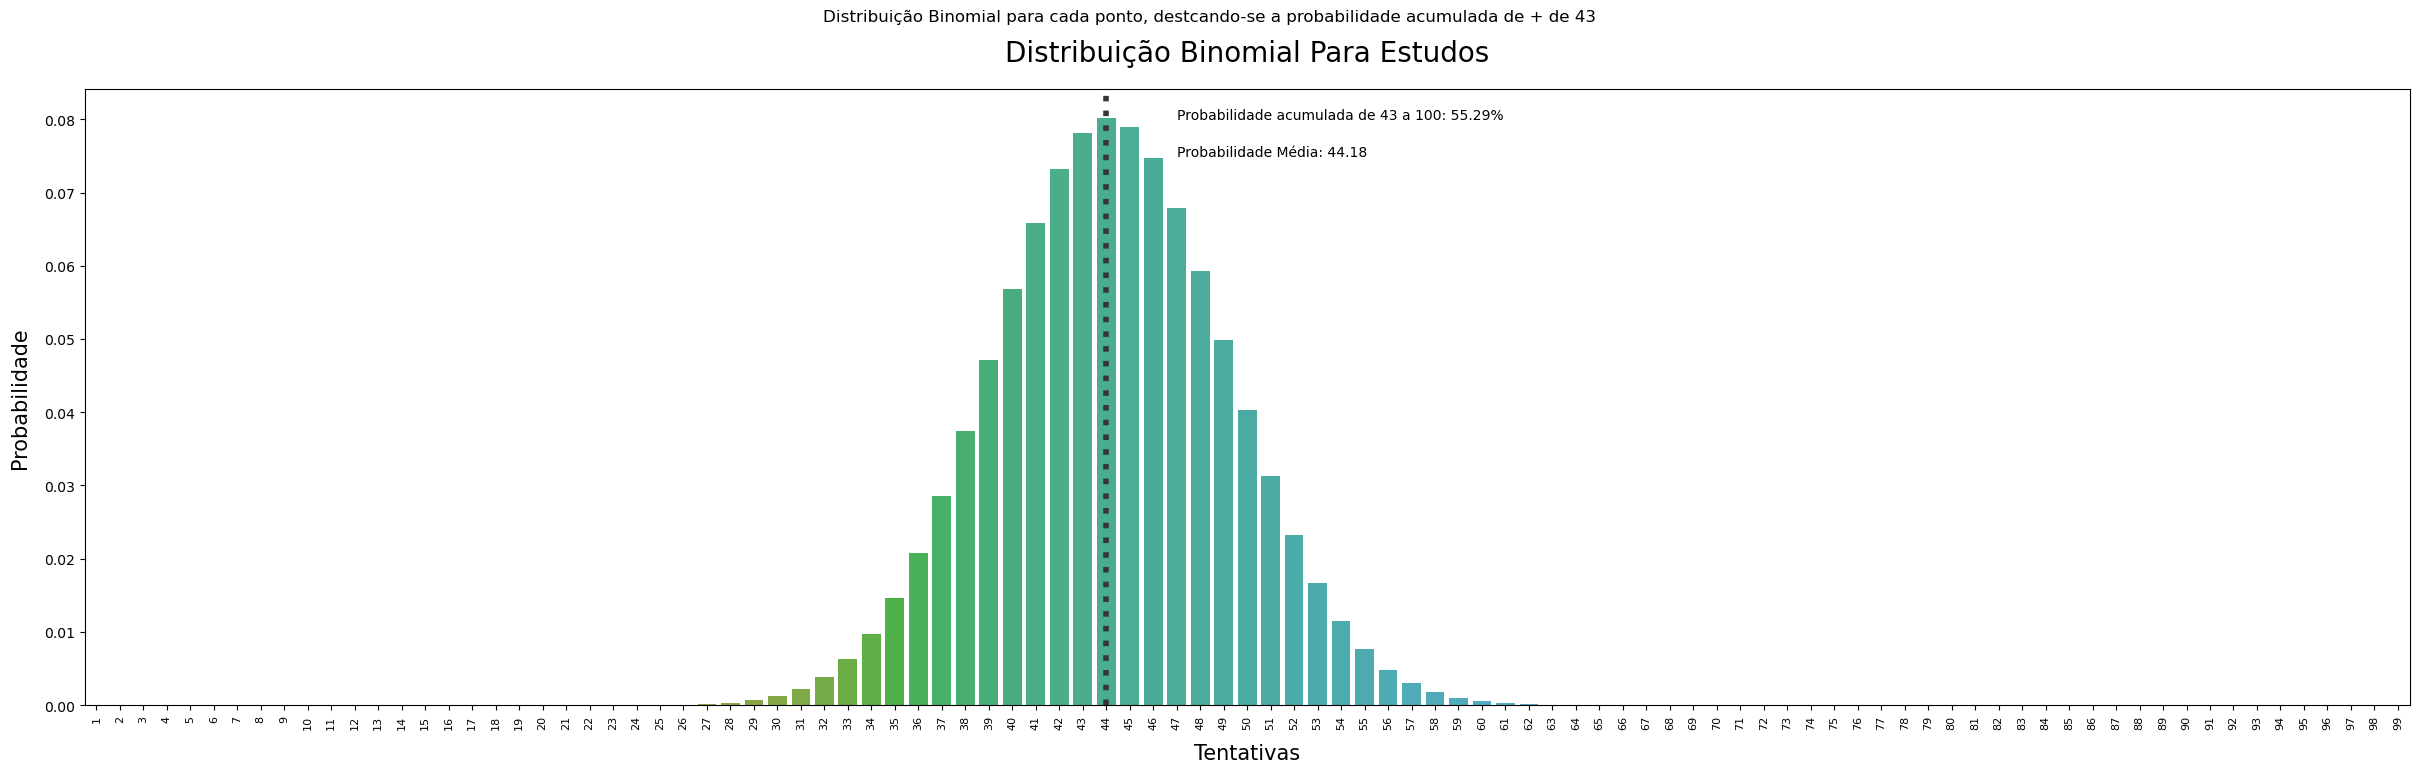

In [11]:
## Distribuição

lista_prob_binom = []
lista_rep = list(range(1,100,1))
for i in lista_rep:
    value = st.binom.pmf(i, 100, 0.4418)
    lista_prob_binom.append(value)

dict = {'Probabilidades' : lista_prob_binom,
        'Tentativas': lista_rep}
df_binom = pd.DataFrame(dict)

plt.figure(figsize=(30,8))
sns.barplot(df_binom, x=df_binom['Tentativas'], y=df_binom['Probabilidades'])
plt.title('Distribuição Binomial Para Estudos', fontsize=20, pad=20)
plt.suptitle('Distribuição Binomial para cada ponto, destcando-se a probabilidade acumulada de + de 43')
plt.xlabel(xlabel='Tentativas', labelpad=10, fontsize=15)
plt.ylabel(ylabel='Probabilidade', labelpad=10, fontsize=15)
plt.axvline(43, linestyle=':',linewidth=4, color='#363636')
plt.xticks(rotation=90, fontsize=8)
plt.annotate(f'Probabilidade acumulada de 43 a 100: {(1-st.binom.cdf(43,100,0.4418)):,.2%}',xy=(45,0.08), xytext=(46,0.08))
plt.annotate(f'Probabilidade Média: {100*0.4418:,.2F}',xy=(45,0.075), xytext=(46,0.075))
plt.show()

In [12]:
#No scipy chamamos a função poisson() e seus métodos

#Em média em cada hora 10 pinguim são capturados
#Em média em cada hora 15 pinguins são capturados
#Em média em cada hora 25 pinguins são capturados

#chamamos o método pmf() para calcular probabilidades de ponto
#o método cdf() ajuda a calcular a probabilidade acumulada até certo ponto
#intervalos nos mostram qual a quantidade de eventos teremos 95% das nossas probabilidades
prob_ponto_poison = st.poisson.pmf(8, 10)
prob_acum_poisson = st.poisson.cdf(8,10)
confianca = st.poisson.interval(0.95, 10)
media = st.poisson.mean(10)

print(f'Probabilidad de no primeiro caso onde a média é de 10 pnguins por hora, qual a probabilidade de exatamente 8 serem capturados: {prob_ponto_poison:,.2%}')
print(f'Probabilidade de até 8 pinguins serem capturados com lambda sendo 10: {prob_acum_poisson:,.2%}')
print(f'Intervalo de Confiança: {confianca}')
print(f'Média Probabilidade: {media}')

Probabilidad de no primeiro caso onde a média é de 10 pnguins por hora, qual a probabilidade de exatamente 8 serem capturados: 11.26%
Probabilidade de até 8 pinguins serem capturados com lambda sendo 10: 33.28%
Intervalo de Confiança: (4.0, 17.0)
Média Probabilidade: 10.0


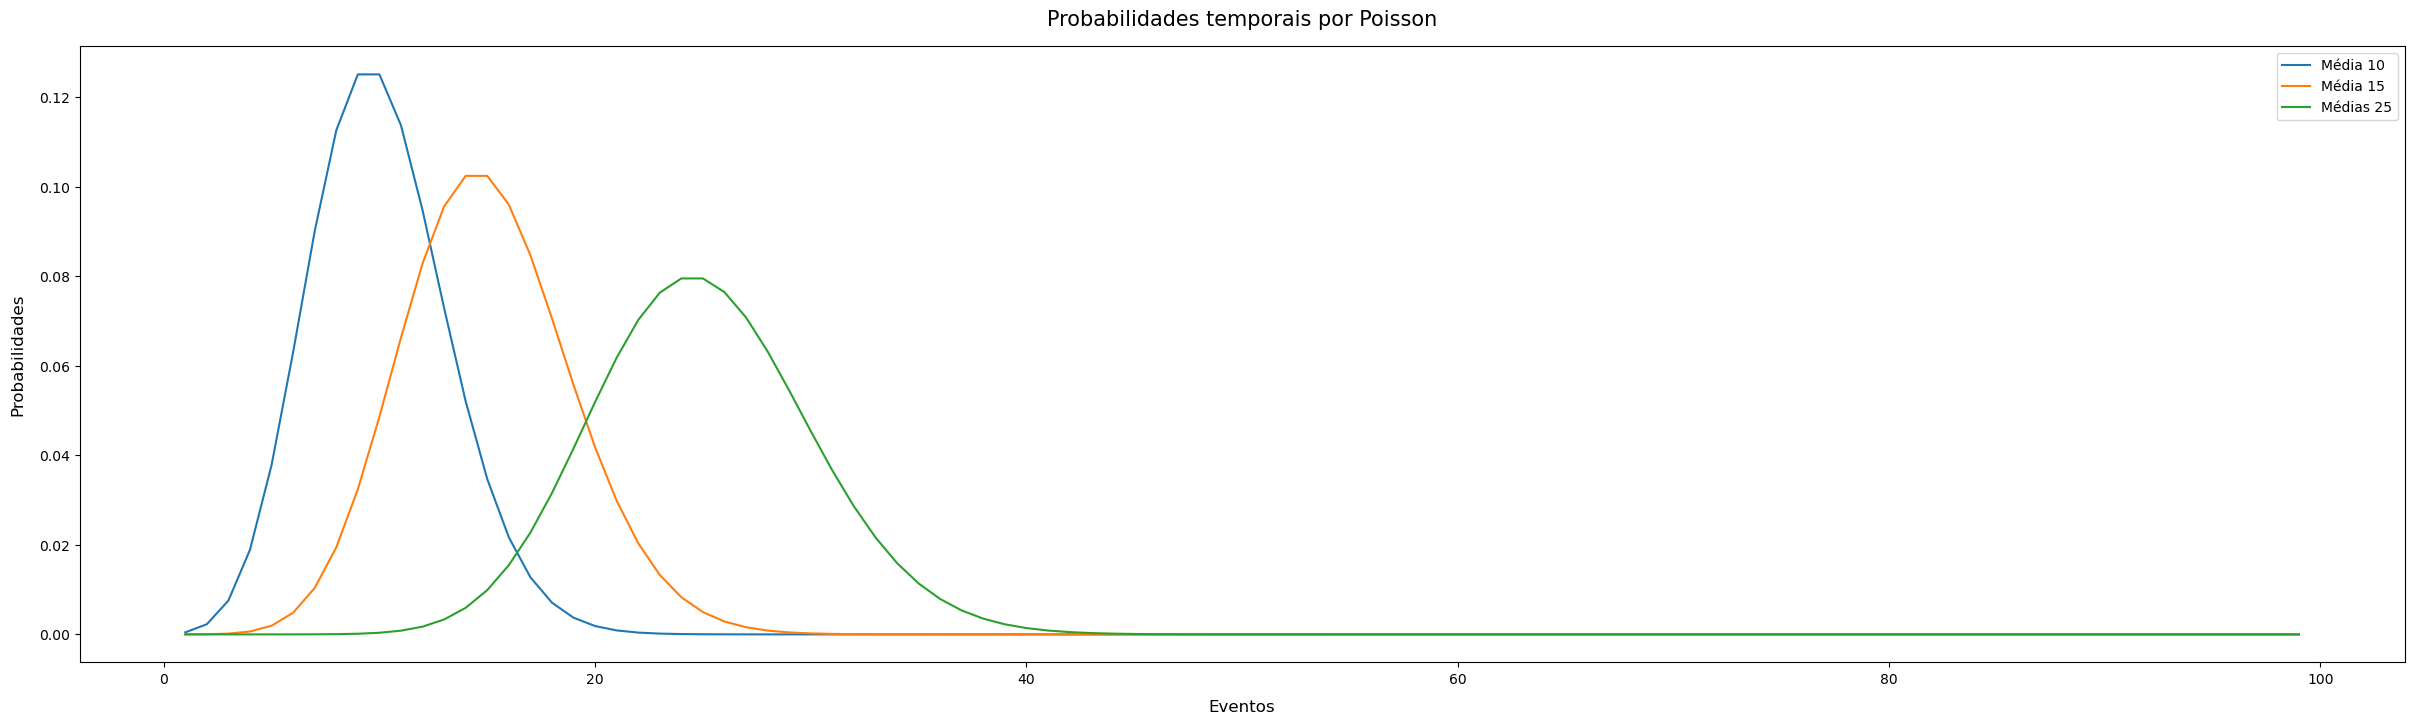

In [13]:
##Plotando as distribuições de cada possibilidade

f1 = []
f2 = []
f3 = []

lista_rep2 = list(range(1,100,1))
for i in lista_rep2:
    value = st.poisson.pmf(i,10)
    f1.append(value)
for i in lista_rep2:
    value = st.poisson.pmf(i,15)
    f2.append(value)
for i in lista_rep2:
    value = st.poisson.pmf(i,25)
    f3.append(value)

dict = {'Tentativas':lista_rep2,
        'Prob10':f1,
        'Prob15':f2,
        'Prob25':f3}

df_poisson = pd.DataFrame(dict)

plt.figure(figsize=(30,8))
plt.title('Probabilidades temporais por Poisson', fontsize=15, pad=15)
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob10'], label='Média 10')
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob15'], label='Média 15')
sns.lineplot(df_poisson, x=df_poisson['Tentativas'], y=df_poisson['Prob25'], label ='Médias 25')
plt.xlabel(xlabel='Eventos', labelpad=10, fontsize=12)
plt.ylabel(ylabel='Probabilidades', labelpad=10, fontsize=12)
plt.legend()
plt.show()

# Variáveis Aleatórias Contínuas

## Outro tipo de VA são as contínuas, valores resultantes de mensurações

O cálculo de probabilidade nesse caso se dá por densidade de curva. Um exemplo seria a distribuição normal de dados contínuos onde calculamos a densidade da probabilidade:

$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Onde:

- \( $x$ \): variável aleatória.
- \( $\mu$ \): média (valor esperado) da distribuição.
- \( $\sigma^2$ \): variância da distribuição (o quadrado do desvio padrão \( $\sigma$ \)).

Para variáveis quantitativas contínuas os dados se encontram entre faixas de valores podendo tomar infinitas formas dentre um mínimo e um máximo

Portanto para a análise de probabilidade de dados contínuos, costumamos calcular as probabilidades provindas de densidades acumuladas de diversas distribuições

No caso de uma distribuição normal, é simples entender a probabilidade pois é crença de que nessa distribuição, valores dentro de 1 desvio padrão encontram-se em aproximadamente 68% dos dados e 2 desvio estão aproximadamente 95% dos dados

### Porém, essa distribuição, tão desejada em modelos estatísticos e Aprendizado de Máquina, não é tão comumente encontrada no mundo real

### Destaco Weibull, Gamma, Logística, Chi-Quadrado, dentre outras.

Vamos entender como analisar cada uma, descobrir qual distribuição temos e como calcular sua probabilidade

#### Funções: st.norm(), st.dweibull(), st.dgamma(), st.expon(), st.chi(), st.chi2(), st.logistic()

mais em https://docs.scipy.org/doc/scipy/reference/stats.html

Antes vamos testar a normalidade de nossos dados, caso nossas distribuições passem no teste de Shapiro, mais sensível a desvios da normalidade, podemos fazer cálculos pelo Z-Score
Teste de shapiro pode ser feito pelo scipy por st.shapiro(data)


após isso o calculo para o Z-score (normal reduzida), cujo valor é importante para que se saiba a probabilidade e verificar outliers em distribuições normais.

### Z-Score (Escore Padrão)

O Z-score (escore padrão) de um ponto de dados \( x \) com média \( $\mu$ \) e desvio padrão \( $\sigma$ \) é calculado como:

$$
Z = \frac{x - \mu}{\sigma}
$$

Onde:

- \( $x$ \): valor do ponto de dados.
- \( $\mu$ \): média (valor esperado) do conjunto de dados.
- \( $\sigma$ \): desvio padrão do conjunto de dados.}

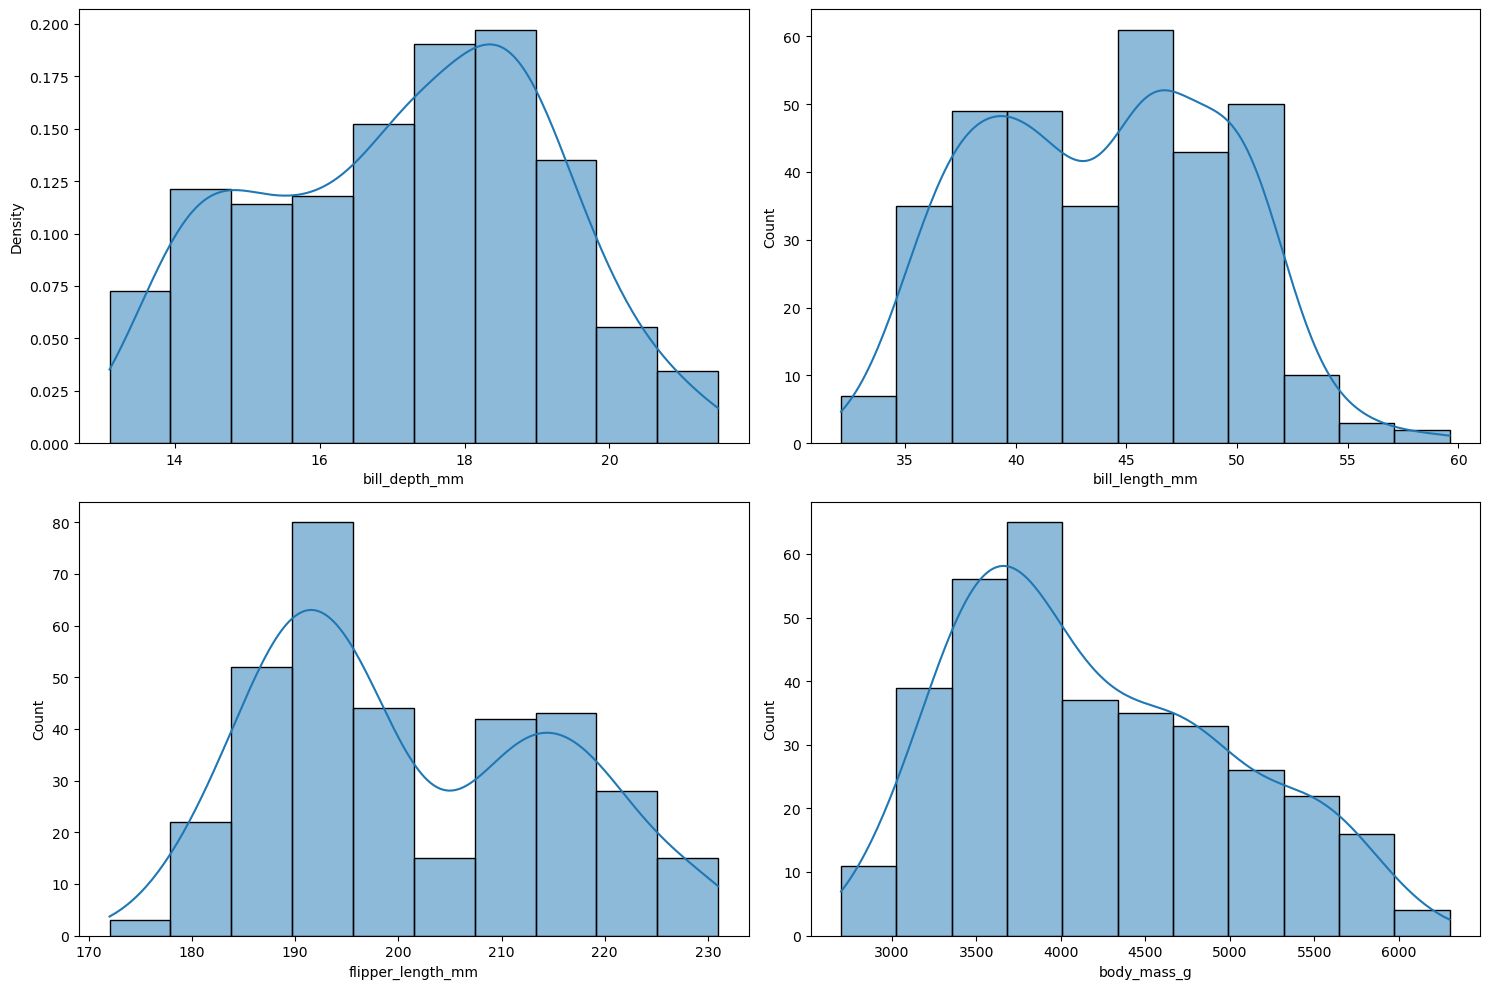

Normal Grafo 1: ShapiroResult(statistic=0.9724009037017822, pvalue=3.856135208479827e-06)
Normal Grafo 2: ShapiroResult(statistic=0.9747693538665771, pvalue=1.0174228009418584e-05)
Normal Grafo 3: ShapiroResult(statistic=0.9512197971343994, pvalue=2.9655846667253627e-09)
Normal Grafo 4: ShapiroResult(statistic=0.9592759013175964, pvalue=3.4799011672248525e-08)


In [15]:
#Pré Visualizando as distribuições de cada var contínua

fig, ax = plt.subplots(2,2,figsize=(15,10))

_ = sns.histplot(df['bill_depth_mm'], ax=ax[0,0], kde=True, stat='density')

_ = sns.histplot(df['bill_length_mm'],ax=ax[0,1], kde=True)

_ = sns.histplot(df['flipper_length_mm'],ax=ax[1,0],kde=True)

_ = sns.histplot(df['body_mass_g'], kde=True,ax=ax[1,1])


fig.tight_layout()
plt.show()

shap1 = st.shapiro(df['bill_depth_mm'])
shap2 = st.shapiro(df['bill_length_mm'])
shap3 = st.shapiro(df['flipper_length_mm'])
shap4 = st.shapiro(df['body_mass_g'])


print(f'Normal Grafo 1: {shap1}')
print(f'Normal Grafo 2: {shap2}')
print(f'Normal Grafo 3: {shap3}')
print(f'Normal Grafo 4: {shap4}')

##### É possível notar que meus dados contínuos não seguem distribuições normais, porém podemos fazer ajuste de bondades com parâmetros estimados para verificar à quais distribuições pertencem para assim podermos calcular as probabilidades.

##### _A ideia desse bloco é explorar essas possibilidades e aprender a lidar com dados reais_

# Teste de bondade:

## Para avaliar a aplicabilidade de meus dados à diversas distribuições, utilizaremos o método fit() do scipy.stats e testando a bondade do ajuste com o teste KS

O teste de bondade de ajuste é utilizado para verificar se um conjunto de dados observados \( $O_i$ \) segue uma distribuição de probabilidade específica com parâmetros estimados \( $\hat{\theta}$ \). A estatística de teste geralmente é formulada como:

$$
T = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
$$

Onde:

- \( $O_i$ \): frequências observadas para cada categoria ou intervalo de dados.
- \( $E_i$ \): frequências esperadas para cada categoria ou intervalo de dados sob a distribuição teórica.
- \( $n$ \): número total de categorias ou intervalos de dados.

Porém antes vamos aplicar um rápido teste mais prático para verificar qual distribuição estamos lidando com o teste de Anderson do scipy.stats

### Teste de Anderson-Darling - sendo mais fácil aplicar porém aceitando no scipy, apenas algumas distribuições

O teste de Anderson-Darling é utilizado para verificar se uma amostra de dados segue uma distribuição teórica \( F(x) \). A estatística de teste de Anderson-Darling é calculada como:

$$
A^2 = -n - \sum_{i=1}^{n} \frac{2i - 1}{n} \left[ \ln(F(X_{(i)})) + \ln(1 - F(X_{(n+1-i)})) \right]
$$

Onde:

- \( $n$ \): tamanho da amostra.
- \( $X_{(i)}$ \): i-ésima menor observação na amostra ordenada.
- \( $F(x)$ \): função de distribuição acumulada (CDF) teórica da distribuição a ser testada.

In [16]:

# Distribuições para testar
distributions = ['norm', 'expon', 'logistic','gumbel_r','weibull_min']
for distribution in distributions:
    # Ajuste a distribuição aos dados
    dist = getattr(st, distribution)
    params = dist.fit(df['bill_depth_mm'])
    
    # Calcule o teste de Anderson-Darling
    ad_statistic, critical_values, significance_level = st.anderson(df['bill_depth_mm'], dist=distribution)
    
    # Imprima os resultados
    print(f'Distribuição: {distribution}')
    print(f'Estatística de Anderson-Darling: {ad_statistic}')
    print(f'Valores críticos: {critical_values}')
    print(f'Níveis de significância correspondentes: {significance_level}')
    print()

Distribuição: norm
Estatística de Anderson-Darling: 2.9611562454298337
Valores críticos: [0.569 0.649 0.778 0.908 1.08 ]
Níveis de significância correspondentes: [15.  10.   5.   2.5  1. ]

Distribuição: expon
Estatística de Anderson-Darling: 123.76162855128183
Valores críticos: [0.92  1.076 1.339 1.603 1.954]
Níveis de significância correspondentes: [15.  10.   5.   2.5  1. ]

Distribuição: logistic
Estatística de Anderson-Darling: 3.4297416576217756
Valores críticos: [0.426 0.563 0.66  0.768 0.905 1.009]
Níveis de significância correspondentes: [25.  10.   5.   2.5  1.   0.5]

Distribuição: gumbel_r
Estatística de Anderson-Darling: 6.726592769192507
Valores críticos: [0.469 0.63  0.749 0.868 1.027]
Níveis de significância correspondentes: [25.  10.   5.   2.5  1. ]

Distribuição: weibull_min
Estatística de Anderson-Darling: 2.797924225922486
Valores críticos: [0.313 0.428 0.506 0.568 0.674 0.779 0.919 1.026]
Níveis de significância correspondentes: [0.5   0.75  0.85  0.9   0.95  0.97

#### No teste de anderson caso nossa estatístrica AD seja maior que nossos níveis de significância, rejeitamos a hipótese nula de que nossos dados seguema distribuição teórica

### Vamos passar aos testes KS com as features proporcionadas por fit()

Fit() é um dos métodos de distribuições, ele retorna args que melhor ajustam seus dados à uma distribuição passada. st.gamma.fit(dados) -> retorna os args para uma distribuição gamma que melhor ajusta seus dados à própria distribuição gamma

Após passamos um teste de KS ou Kolmogorov-Smirnov

Caso p_value do teste KS seja < 0.05 (considerando um nível de confiança padrão de 95%), significa que há evidências suficientes para rejeitar a hipótese nula de que seus dados seguem a distribuição passada.
Caso p_value seja maior > 0.05, podemos considerar que os args do fit() se encaixam bem aos seus dados e portanto podem ser usados para calcular as probabilidades conforme a distribuição testada

Como estamos aplicando estudos vamos utilizar apenas as variáveis "bill_depth_mm" e "bill_length_mm"


In [17]:
#Gamma
gg = st.gamma.fit(df['bill_depth_mm'], floc=0)
d, p_value = st.kstest(df['bill_depth_mm'], 'gamma', args=gg)
print(f'Estatística D: {d}, Valor-p: {p_value}')


##Qui-Quadrado
chi = st.chi2.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'chi2', args=chi)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Weibull
weibull = st.dweibull.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'dweibull', args=weibull)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Pareto
pareto = st.pareto.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'pareto', args=pareto)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Normal 
norm = st.norm.fit(df['bill_depth_mm'])
d, p_value = st.kstest(df['bill_depth_mm'], 'norm', args=norm)
print(f'Estatística D: {d}, Valor-p: {p_value}')

Estatística D: 0.09168285394761799, Valor-p: 0.005751081183505389
Estatística D: 0.22334056527915858, Valor-p: 1.483693884837712e-15
Estatística D: 0.09200646289760532, Valor-p: 0.005518718293975217
Estatística D: 0.21514568391535882, Valor-p: 1.8647972441774698e-14
Estatística D: 0.08008117270134596, Valor-p: 0.022916014263616082


In [18]:
#Gamma
gg = st.gamma.fit(df['bill_length_mm'], floc=0)
d, p_value = st.kstest(df['bill_length_mm'], 'gamma', args=gg)
print(f'Estatística D: {d}, Valor-p: {p_value}')


##Qui-Quadrado
chi = st.chi2.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'chi2', args=chi)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Weibull
weibull = st.dweibull.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'dweibull', args=weibull)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Pareto
pareto = st.pareto.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'pareto', args=pareto)
print(f'Estatística D: {d}, Valor-p: {p_value}')

##Normal 
norm = st.norm.fit(df['bill_length_mm'])
d, p_value = st.kstest(df['bill_length_mm'], 'norm', args=norm)
print(f'Estatística D: {d}, Valor-p: {p_value}')


Estatística D: 0.08343517319261118, Valor-p: 0.015664266113068617
Estatística D: 0.8974922246832591, Valor-p: 0.0
Estatística D: 0.03881640711386819, Valor-p: 0.6630793613535295
Estatística D: 0.23015008750168167, Valor-p: 1.6796395992296638e-16
Estatística D: 0.07138866408098316, Valor-p: 0.05712464539722051


In [19]:
#bill_depth_mm teoricamente, a um nível de confiança de 95%, não se encaixou em nenhum teste, porém após avalidado o hist e qqplot podemos acreditar em um nível de confiança de 90% 
#já bill_length_mm teve excelente performance nas features proporcionadas por fit() nas distribuição weibull


#probabilidade de bill_depth_mm se considerando os args do fit() à um nível de confiança de 90%
norm = st.norm.fit(df['bill_depth_mm'])
prop_bill = st.norm.pdf(16, norm[0], norm[1])
prop_bill_acum = st.norm.cdf(16, norm[0], norm[1])

#probabilidade de bill_length_mm considerando os args do fit() à distribuição weibull
weibull = st.dweibull.fit(df['bill_length_mm'])
prop_len = st.dweibull.pdf(43, weibull[0], weibull[1])
prop_len_acum = st.dweibull.cdf(43, weibull[0], weibull[1])


print(f'Probabilidade ponto da normal: {prop_bill:,.2%}')
print(f'Probabilidade acumulada da normal: {prop_bill_acum:,.2%}')
print(f'Probabilidade ponto da weibull: {prop_len:,.2%}')
print(f'Probabilidade acumulada da weibull: {prop_len_acum:,.2%}')

Probabilidade ponto da normal: 17.08%
Probabilidade acumulada da normal: 28.00%
Probabilidade ponto da weibull: 34.83%
Probabilidade acumulada da weibull: 21.99%


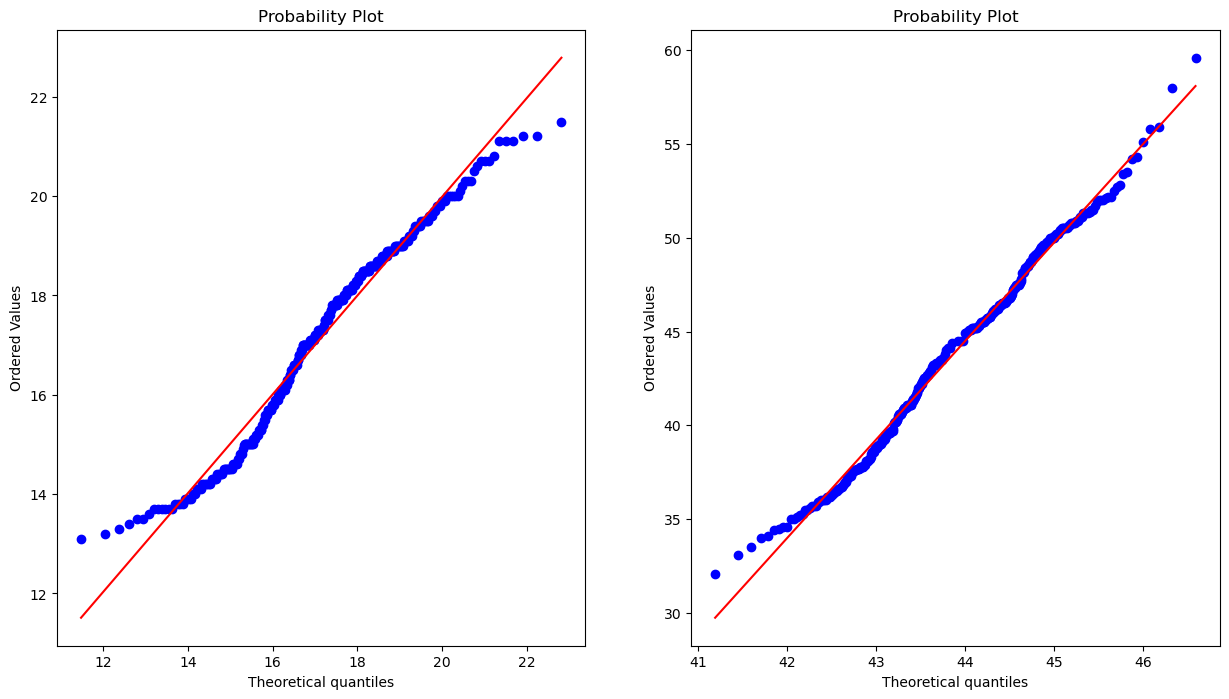

In [20]:
##QQPLOTS DAS DISTRIBUIÇÕES AJUSTADAS
fig, ax = plt.subplots(1,2,figsize=(15,8))

#st.probplot() plota com qqplot com qqline para analisarmos a distribuição por quantis -> quanto mais pontos encaixados na linhas vermelha, mais próxima nossos dados são de dada distribuição
st.probplot(df['bill_depth_mm'], dist='norm', sparams=(norm[0], norm[1]), plot=ax[0])
st.probplot(df['bill_length_mm'], dist='dweibull', sparams=(weibull[0], weibull[1]), plot=ax[1])

plt.show()

In [21]:
st.norm.interval(0.95, norm[0], norm[1]) #intervalo de dados de 95% de chances de se encontrar o evento

(13.285800858686901, 21.011359173788943)

In [22]:
norm[0] #Esperança média

17.148580016237922